<a href="https://colab.research.google.com/github/arashash/deep_exercises/blob/main/Ch2_Exam1_Feedback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2 - Linear Algebra

## 2.1 Scalars, Vectors, Matrices and Tensors

### Q1 [10 Points, M]
Denote the set of all n-dimensional binary vectors with Cartesian product notation

Solution:

$\mathbb{R}^{n}$

<font color='red'>Feedback: the binary set is $\{0, 1\}$</font>

Grade: 5/10

### Q2 [10 Points, S]
Given the vector
$
\boldsymbol{x}=\left[\begin{array}{c}
x_{1} \\
x_{2} \\
x_{3} \\
x_{4} \\
\end{array}\right]
$, 
and the set 
$
S = \{2, 4\}
$,
obtain the vectors $\boldsymbol{x}_{S}$ and $\boldsymbol{x}_{-S}$

Solution:

$x_{S} = [x_{2}, x_{4}]$

$x_{-S} = [x_{1}, x_{3}]$

<font color='red'>Feedback: they should be column vectors</font>
    
Grade: 8/10

### Q3 [20 Points, S]
Evaluate the following expressions with broadcasting rules,

$$
\left[\begin{array}{lll}
0 & 1 & 2
\end{array}\right]+[5]=
$$

$$
\left[\begin{array}{lll}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{array}\right]+\left[\begin{array}{lll}
0 & 1 & 1
\end{array}\right]=
$$

$$
\left[\begin{array}{l}
0 \\
1 \\
2
\end{array}\right]+\left[\begin{array}{ll}
0 & 1 & 2
\end{array}\right]=
$$

Solution:

$
\left[\begin{array}{lll}
0 & 1 & 2
\end{array}\right]+[5]= \left[\begin{array}{lll}
5 & 6 & 7
\end{array}\right]
$

$
\left[\begin{array}{lll}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{array}\right]+\left[\begin{array}{lll}
0 & 1 & 1
\end{array}\right]= \left[\begin{array}{lll}
1 & 2 & 2 \\
1 & 2 & 2 \\
1 & 2 & 2
\end{array}\right]
$

$
\left[\begin{array}{l}
0 \\
1 \\
2
\end{array}\right]+\left[\begin{array}{ll}
0 & 1 & 2
\end{array}\right]= \left[\begin{array}{ll}
0 & 2 & 4
\end{array}\right]
$

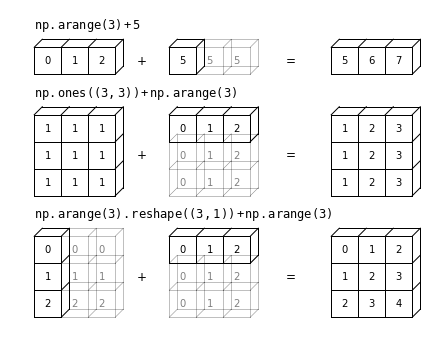

In [ ]:
#@title
# Adapted from astroML: see http://www.astroml.org/book_figures/appendix/fig_broadcast_visual.html
import numpy as np
from matplotlib import pyplot as plt

#------------------------------------------------------------
# Draw a figure and axis with no boundary
fig = plt.figure(figsize=(6, 4.5), facecolor='w')
ax = plt.axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)


def draw_cube(ax, xy, size, depth=0.4,
              edges=None, label=None, label_kwargs=None, **kwargs):
    """draw and label a cube.  edges is a list of numbers between
    1 and 12, specifying which of the 12 cube edges to draw"""
    if edges is None:
        edges = range(1, 13)

    x, y = xy

    if 1 in edges:
        ax.plot([x, x + size],
                [y + size, y + size], **kwargs)
    if 2 in edges:
        ax.plot([x + size, x + size],
                [y, y + size], **kwargs)
    if 3 in edges:
        ax.plot([x, x + size],
                [y, y], **kwargs)
    if 4 in edges:
        ax.plot([x, x],
                [y, y + size], **kwargs)

    if 5 in edges:
        ax.plot([x, x + depth],
                [y + size, y + depth + size], **kwargs)
    if 6 in edges:
        ax.plot([x + size, x + size + depth],
                [y + size, y + depth + size], **kwargs)
    if 7 in edges:
        ax.plot([x + size, x + size + depth],
                [y, y + depth], **kwargs)
    if 8 in edges:
        ax.plot([x, x + depth],
                [y, y + depth], **kwargs)

    if 9 in edges:
        ax.plot([x + depth, x + depth + size],
                [y + depth + size, y + depth + size], **kwargs)
    if 10 in edges:
        ax.plot([x + depth + size, x + depth + size],
                [y + depth, y + depth + size], **kwargs)
    if 11 in edges:
        ax.plot([x + depth, x + depth + size],
                [y + depth, y + depth], **kwargs)
    if 12 in edges:
        ax.plot([x + depth, x + depth],
                [y + depth, y + depth + size], **kwargs)

    if label:
        if label_kwargs is None:
            label_kwargs = {}
        ax.text(x + 0.5 * size, y + 0.5 * size, label,
                ha='center', va='center', **label_kwargs)

solid = dict(c='black', ls='-', lw=1,
             label_kwargs=dict(color='k'))
dotted = dict(c='black', ls='-', lw=0.5, alpha=0.5,
              label_kwargs=dict(color='gray'))
depth = 0.3

#------------------------------------------------------------
# Draw top operation: vector plus scalar
draw_cube(ax, (1, 10), 1, depth, [1, 2, 3, 4, 5, 6, 9], '0', **solid)
draw_cube(ax, (2, 10), 1, depth, [1, 2, 3, 6, 9], '1', **solid)
draw_cube(ax, (3, 10), 1, depth, [1, 2, 3, 6, 7, 9, 10], '2', **solid)

draw_cube(ax, (6, 10), 1, depth, [1, 2, 3, 4, 5, 6, 7, 9, 10], '5', **solid)
draw_cube(ax, (7, 10), 1, depth, [1, 2, 3, 6, 7, 9, 10, 11], '5', **dotted)
draw_cube(ax, (8, 10), 1, depth, [1, 2, 3, 6, 7, 9, 10, 11], '5', **dotted)

draw_cube(ax, (12, 10), 1, depth, [1, 2, 3, 4, 5, 6, 9], '5', **solid)
draw_cube(ax, (13, 10), 1, depth, [1, 2, 3, 6, 9], '6', **solid)
draw_cube(ax, (14, 10), 1, depth, [1, 2, 3, 6, 7, 9, 10], '7', **solid)

ax.text(5, 10.5, '+', size=12, ha='center', va='center')
ax.text(10.5, 10.5, '=', size=12, ha='center', va='center')
ax.text(1, 11.5, r'${\tt np.arange(3) + 5}$',
        size=12, ha='left', va='bottom')

#------------------------------------------------------------
# Draw middle operation: matrix plus vector

# first block
draw_cube(ax, (1, 7.5), 1, depth, [1, 2, 3, 4, 5, 6, 9], '1', **solid)
draw_cube(ax, (2, 7.5), 1, depth, [1, 2, 3, 6, 9], '1', **solid)
draw_cube(ax, (3, 7.5), 1, depth, [1, 2, 3, 6, 7, 9, 10], '1', **solid)

draw_cube(ax, (1, 6.5), 1, depth, [2, 3, 4], '1', **solid)
draw_cube(ax, (2, 6.5), 1, depth, [2, 3], '1', **solid)
draw_cube(ax, (3, 6.5), 1, depth, [2, 3, 7, 10], '1', **solid)

draw_cube(ax, (1, 5.5), 1, depth, [2, 3, 4], '1', **solid)
draw_cube(ax, (2, 5.5), 1, depth, [2, 3], '1', **solid)
draw_cube(ax, (3, 5.5), 1, depth, [2, 3, 7, 10], '1', **solid)

# second block
draw_cube(ax, (6, 7.5), 1, depth, [1, 2, 3, 4, 5, 6, 9], '0', **solid)
draw_cube(ax, (7, 7.5), 1, depth, [1, 2, 3, 6, 9], '1', **solid)
draw_cube(ax, (8, 7.5), 1, depth, [1, 2, 3, 6, 7, 9, 10], '2', **solid)

draw_cube(ax, (6, 6.5), 1, depth, range(2, 13), '0', **dotted)
draw_cube(ax, (7, 6.5), 1, depth, [2, 3, 6, 7, 9, 10, 11], '1', **dotted)
draw_cube(ax, (8, 6.5), 1, depth, [2, 3, 6, 7, 9, 10, 11], '2', **dotted)

draw_cube(ax, (6, 5.5), 1, depth, [2, 3, 4, 7, 8, 10, 11, 12], '0', **dotted)
draw_cube(ax, (7, 5.5), 1, depth, [2, 3, 7, 10, 11], '1', **dotted)
draw_cube(ax, (8, 5.5), 1, depth, [2, 3, 7, 10, 11], '2', **dotted)

# third block
draw_cube(ax, (12, 7.5), 1, depth, [1, 2, 3, 4, 5, 6, 9], '1', **solid)
draw_cube(ax, (13, 7.5), 1, depth, [1, 2, 3, 6, 9], '2', **solid)
draw_cube(ax, (14, 7.5), 1, depth, [1, 2, 3, 6, 7, 9, 10], '3', **solid)

draw_cube(ax, (12, 6.5), 1, depth, [2, 3, 4], '1', **solid)
draw_cube(ax, (13, 6.5), 1, depth, [2, 3], '2', **solid)
draw_cube(ax, (14, 6.5), 1, depth, [2, 3, 7, 10], '3', **solid)

draw_cube(ax, (12, 5.5), 1, depth, [2, 3, 4], '1', **solid)
draw_cube(ax, (13, 5.5), 1, depth, [2, 3], '2', **solid)
draw_cube(ax, (14, 5.5), 1, depth, [2, 3, 7, 10], '3', **solid)

ax.text(5, 7.0, '+', size=12, ha='center', va='center')
ax.text(10.5, 7.0, '=', size=12, ha='center', va='center')
ax.text(1, 9.0, r'${\tt np.ones((3,\, 3)) + np.arange(3)}$',
        size=12, ha='left', va='bottom')

#------------------------------------------------------------
# Draw bottom operation: vector plus vector, double broadcast

# first block
draw_cube(ax, (1, 3), 1, depth, [1, 2, 3, 4, 5, 6, 7, 9, 10], '0', **solid)
draw_cube(ax, (1, 2), 1, depth, [2, 3, 4, 7, 10], '1', **solid)
draw_cube(ax, (1, 1), 1, depth, [2, 3, 4, 7, 10], '2', **solid)

draw_cube(ax, (2, 3), 1, depth, [1, 2, 3, 6, 7, 9, 10, 11], '0', **dotted)
draw_cube(ax, (2, 2), 1, depth, [2, 3, 7, 10, 11], '1', **dotted)
draw_cube(ax, (2, 1), 1, depth, [2, 3, 7, 10, 11], '2', **dotted)

draw_cube(ax, (3, 3), 1, depth, [1, 2, 3, 6, 7, 9, 10, 11], '0', **dotted)
draw_cube(ax, (3, 2), 1, depth, [2, 3, 7, 10, 11], '1', **dotted)
draw_cube(ax, (3, 1), 1, depth, [2, 3, 7, 10, 11], '2', **dotted)

# second block
draw_cube(ax, (6, 3), 1, depth, [1, 2, 3, 4, 5, 6, 9], '0', **solid)
draw_cube(ax, (7, 3), 1, depth, [1, 2, 3, 6, 9], '1', **solid)
draw_cube(ax, (8, 3), 1, depth, [1, 2, 3, 6, 7, 9, 10], '2', **solid)

draw_cube(ax, (6, 2), 1, depth, range(2, 13), '0', **dotted)
draw_cube(ax, (7, 2), 1, depth, [2, 3, 6, 7, 9, 10, 11], '1', **dotted)
draw_cube(ax, (8, 2), 1, depth, [2, 3, 6, 7, 9, 10, 11], '2', **dotted)

draw_cube(ax, (6, 1), 1, depth, [2, 3, 4, 7, 8, 10, 11, 12], '0', **dotted)
draw_cube(ax, (7, 1), 1, depth, [2, 3, 7, 10, 11], '1', **dotted)
draw_cube(ax, (8, 1), 1, depth, [2, 3, 7, 10, 11], '2', **dotted)

# third block
draw_cube(ax, (12, 3), 1, depth, [1, 2, 3, 4, 5, 6, 9], '0', **solid)
draw_cube(ax, (13, 3), 1, depth, [1, 2, 3, 6, 9], '1', **solid)
draw_cube(ax, (14, 3), 1, depth, [1, 2, 3, 6, 7, 9, 10], '2', **solid)

draw_cube(ax, (12, 2), 1, depth, [2, 3, 4], '1', **solid)
draw_cube(ax, (13, 2), 1, depth, [2, 3], '2', **solid)
draw_cube(ax, (14, 2), 1, depth, [2, 3, 7, 10], '3', **solid)

draw_cube(ax, (12, 1), 1, depth, [2, 3, 4], '2', **solid)
draw_cube(ax, (13, 1), 1, depth, [2, 3], '3', **solid)
draw_cube(ax, (14, 1), 1, depth, [2, 3, 7, 10], '4', **solid)

ax.text(5, 2.5, '+', size=12, ha='center', va='center')
ax.text(10.5, 2.5, '=', size=12, ha='center', va='center')
ax.text(1, 4.5, r'${\tt np.arange(3).reshape((3,\, 1)) + np.arange(3)}$',
        ha='left', size=12, va='bottom')

ax.set_xlim(0, 16)
ax.set_ylim(0.5, 12.5)
print()

<font color='red'>Feedback: last expression is wrong, check out the figure</font>
    
Grade: 10/20

## 2.2-3 Multiplying Matrices and Vectors and Identity and Inverse Matrices

### Q4 [20 Points, H]
Let $A$ be a $2 \times 2$ matrix, if $A B=B A$ for every $B$ of the size $2 \times 2$, Prove that:
$$
A=\left[\begin{array}{ll}
a & 0 \\
0 & a
\end{array}\right], \
a \in \mathbb{R}
$$


Solution:

By the definition of matrix product:

$(AB)_{ij} = \Sigma A_{ik} B_{kj}$ : This means scalar product of the $i$th row vector of A with the $j$th column vector of B.

$(BA)_{ij} = \Sigma B_{ik} A_{kj}$ : This means scalar product of the $i$th row vector of B with the $j$th column vector of A.

Since row and column vectors of A is equal to each other ($A_{:,j} = A_{i, :}$), A holds for commutative property of matrix multiplication.

<span style='color:green'>
$$
\begin{pmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{pmatrix}
\begin{pmatrix} b_{11} & b_{12} \\ b_{21} & b_{22} \end{pmatrix}=
\begin{pmatrix} b_{11} & b_{12} \\ b_{21} & b_{22} \end{pmatrix}
\begin{pmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{pmatrix} \Rightarrow \\
\begin{cases}\require{cancel}\cancel{a_{11}b_{11}}+a_{12}b_{21}=\cancel{b_{11}a_{11}}+b_{12}a_{21}\\
a_{11}b_{12}+a_{12}b_{22}=b_{11}a_{12}+b_{12}a_{22}\\
a_{21}b_{11}+a_{22}b_{21}=b_{21}a_{11}+b_{22}a_{21}\\
a_{21}b_{12}+\cancel{a_{22}b_{22}}=b_{21}a_{12}+\cancel{b_{22}a_{22}}\end{cases}
$$

Since $b_{12}$ and $b_{21}$ can be any number, in particular, $b_{12}=0$ and $b_{21} \neq 0,$ we get:
$a_{12}=0$
Similarly, for $b_{12} \neq 0$ and $b_{21}=0,$ we get $a_{21}=0$
From $(2),$ since $a_{12}=0$ and $b_{12}$ is an arbitrary number, we get $a_{11} b_{12}=b_{12} a_{22} \Rightarrow a_{11}=a_{22}$

<font color='red'>Feedback: The reverse statement is proved
check above for the solution</font>


Grade: 5/15 for your reasoning!

## 2.4 Linear Dependence and Span

### Q5 [10 Points, H]
Prove that if a linear system of equations have two solutions, then it has infinitely many solutions.

Solution:

Assume that we have $ Ax = b$

If both $x$ and $y$ are the solutions, then $z=\alpha \boldsymbol{x}+(1-\alpha) \boldsymbol{y}$ is a solution for any real $\alpha$. Since it holds for any real $\alpha$, there are infinite number of solution possible. So, it is not possible to have more than one but less than infinetly many solutions for a particular b.

<font color='red'>Feedback: Perfect!</font>

Grade: 10/10

### Q6 [5 Points, M]
Given $A x=0$, where $A \in \mathbb{R}^{m \times n}$ is any matrix, and $x \in \mathbb{R}^{n}$ is a vector of unknown variables to be solved, what is the condition such that there is infinitely many solutions?

Solution:

If A is not invertable (i.e., $A^{-1}$ does not exist), then there is more than one solution for each value of b, in other words, there are infinitely many solutions (see question5).

To A to be invertable, equation should have at most one solution. For that, b needs to be in the span of columns of A (i.e., column space). So, A must have $n$ linearly independent columns and be a square matrix, in other words a singular matrix.

Therefore, when there are infintely many solutions of homogenous system A is not invertable, as a result, conditions above are not met.

For example, let  $\alpha$  be a solution to  $Ax=b$ , then  $x=\alpha+c$  is a solution if  $c$  is a solution to the homogenous system  Ax=0. Here, it means that A is invertable and there is at most one solution for each b.

<font color='red'>Feedback: invertibility is not the least condition, for example if matrix is not square it can still have unique solution but it's not invertible! solution is $m<n$ i.e., when there is less equations than unknowns</font>
    
Grade: 0/5

## 2.5 Norms

### Q7 [15 Points, M]
Prove that **Max Norm** follows these conditions,
$$
\begin{align}
f(\boldsymbol{x})=0 \Rightarrow \boldsymbol{x}=\mathbf{0} \\
f(\boldsymbol{x}+\boldsymbol{y}) \leq f(\boldsymbol{x})+f(\boldsymbol{y}) \\
\forall \alpha \in \mathbb{R}, f(\alpha \boldsymbol{x})=|\alpha| f(\boldsymbol{x})
\end{align}
$$

Solution:


 * $f(\boldsymbol{x})=0 \Rightarrow \boldsymbol{x}=\mathbf{0}$ : By definition of max norm, the absolute value of the element is simplified with the largest magnitude in the vector (i.e., $\|x\|_{\infty}=\max _{i}\left|x_{i}\right|$). Therefore, if $f(\boldsymbol{x})=0$, $x$ should be also zero.

    We can also prove it by thinking the case where $x\neq0$ (i.e., at least one element of the vector $x$ is not equal to zero). Assume that $k$th element of x is non-zero. Then, with the max norm definition above, the max norm of any $i$th element would be greater or equal (if $k$th element is the largest magnitude) than $k$th element $\|x\|_{\infty}=\max _{i}\left|x_{i}\right| \geq |x_k|$. Because of the nature of absolute value, these all would be greater than 0.

* $f(\boldsymbol{x}+\boldsymbol{y}) \leq f(\boldsymbol{x})+f(\boldsymbol{y})$ : This is the triangle inequality. We can prove that the max norm holds triangle inequality by applying the max norm to the left hand side.

    $\begin{aligned}\|x+y\|_{\infty} &=\max _{i}\left|x_{i}+y_{i}\right| \\ & \leq \max _{i}\left(\left|x_{i}\right|+\left|y_{i}\right|\right) \\ & \leq \max _{i}\left(\left|x_{i}\right|+\max _{j}\left|y_{j}\right|\right)\\ &=\max _{i}\left|x_{i}\right|+\max _{j}\left|y_{j}\right|=\|x\|_{\infty}+\|y\|_{\infty} \end{aligned}$
    

* $\forall \alpha \in \mathbb{R}, f(\alpha \boldsymbol{x})=|\alpha| f(\boldsymbol{x})$

$\|\alpha x\|_{\infty}=\max _{i}\left|\alpha x_{i}\right| = \max _{i}\left|\alpha|\left|x_{i}|=| \alpha\left|\max _{i}\right| x_{i}|=| \alpha \mid\right\| x \|_{\infty}\right.$


<font color='red'>Feedback: this line is wrong but extra: $\leq \max _{i}\left(\left|x_{i}\right|+\max _{j}\left|y_{j}\right|\right)$</font>

Grade: 14/15

## 2.6 Special Kinds of Matrices and Vectors

### Q8 [10 Points, M]
Solve the following system of equations,

$$
\frac{1}{2}\left[\begin{array}{cccc}
1 & 1 & 1 & 1 \\
1 & 1 & -1 & -1 \\
1 & -1 & 1 & -1 \\
1 & -1 & -1 & 1
\end{array}\right] \left[\begin{array}{c}
x_{1} \\
x_{2} \\
x_{3} \\
x_{4} \\
\end{array}\right] = \left[\begin{array}{c}
1 \\
2 \\
3 \\
4 \\
\end{array}\right]
$$

Solution:

This is a symmetric matrix because $ A = A^{T} $

It can be easily seen from the matrix that $x_{2}, x_{3}, x_{4}$ cancel during matrix product.

Therefore, what remains is:

$\frac{1}{4} 4x_{1} = 1 + 2 + 3 + 4$

$x_1 = 10 $

Then, we can back substitute:

$r_1 + r_4 = \frac{1}{4}(2 x_1 + 2x_4) = 5,  x_4 = 0$

$r_2 + r_4 = \frac{1}{4}(2 x_1 - 2x_3) = 6,  x_3 = -2$

$r_1 + r_2 = \frac{1}{4}(2 x_1 + 2x_2) = 3,  x_2 = -4$

<font color='red'>Feedback: correct but it would have been much faster to take advantage of orthogonality!</font>

Grade: 10/10

<span style='color:green'>
$$
\left[\begin{array}{c}
x_{1} \\
x_{2} \\
x_{3} \\
x_{4} \\
\end{array}\right] = 
\frac{1}{2}\left[\begin{array}{cccc}
1 & 1 & 1 & 1 \\
1 & 1 & -1 & -1 \\
1 & -1 & 1 & -1 \\
1 & -1 & -1 & 1
\end{array}\right] \left[\begin{array}{c}
1 \\
2 \\
3 \\
4 \\
\end{array}\right] = \left[\begin{array}{c}
5 \\
-2 \\
-1 \\
0 \\
\end{array}\right]
$$

# GRADE: 62/100